In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
df.columns=df.columns.str.replace('*','')
df

C:\Users\nirmal kumaresan\AppData\Local\Temp\ipykernel_9396\278933312.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns=df.columns.str.replace('*','')


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
df.shape

(1156, 7)

In [7]:
df['PURPOSE'].isnull().sum()

503

In [8]:
df['PURPOSE'].isnull().sum()/df.shape[0]*100

43.5121107266436

In [9]:
df[df['END_DATE'].isnull()] #to find the specefic data in the 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [10]:
df.dropna(axis=0,subset=['END_DATE', 'CATEGORY', 'START', 'STOP'],how='all',inplace=True)

In [11]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [12]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [14]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [15]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Data Analysis

In [17]:
#most frequency start location
start=df['START'].value_counts()
start

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

<Axes: >

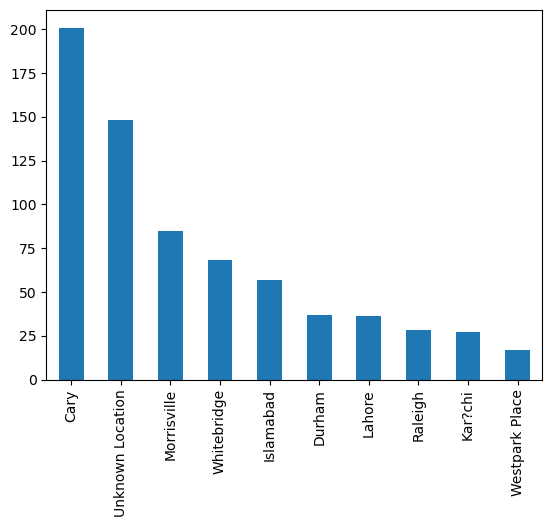

In [18]:
start.head(10).plot(kind='bar')

In [19]:
stop=df['STOP'].value_counts()
stop

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

<Axes: >

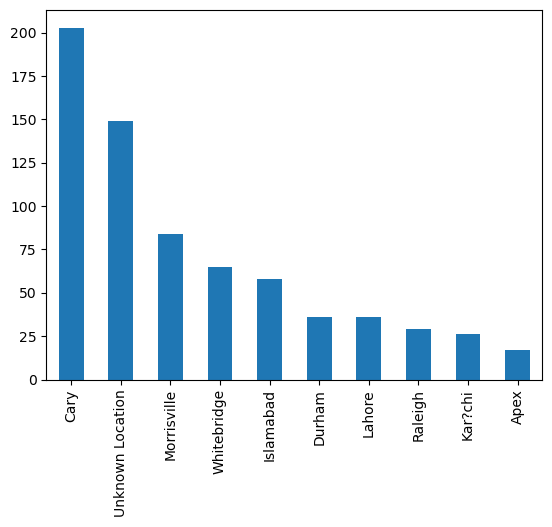

In [20]:
stop.head(10).plot(kind='bar')

<Axes: xlabel='count', ylabel='PURPOSE'>

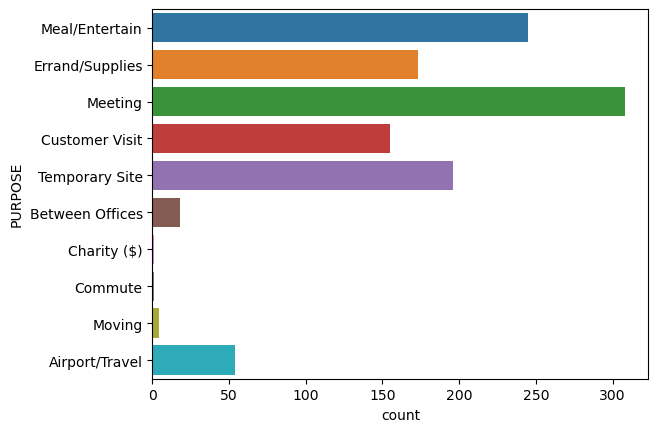

In [21]:
sns.countplot(y=df.PURPOSE)

In [22]:
df['MINUTES']=(df.END_DATE-df.START_DATE)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [23]:
df['MINUTES']=df.MINUTES.dt.total_seconds()/60
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


<Axes: xlabel='MONTH', ylabel='count'>

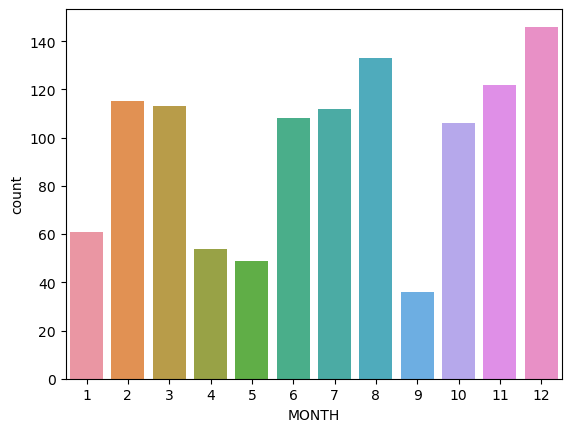

In [24]:
df['MONTH']=df['START_DATE'].dt.month
sns.countplot(x=df.MONTH)

In [25]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12


In [26]:
# stop=df['STOP'].value_counts()
# stop
ROUNDTRIP=(df['START']==df['STOP']).value_counts()
ROUNDTRIP

False    867
True     288
dtype: int64

In [27]:
df.groupby(df['PURPOSE']).agg({'MILES':['mean','min','max']}).reset_index()

PURPOSE       MILES              
                          mean    min    max
0   Airport/Travel   14.953704    0.9  156.9
1  Between Offices   10.944444    1.9   39.2
2      Charity ($)   15.100000   15.1   15.1
3          Commute  180.200000  180.2  180.2
4   Customer Visit   16.065806    0.6  310.3
5  Errand/Supplies    5.928902    0.5  195.3
6   Meal/Entertain    5.773878    0.6   36.5
7          Meeting   12.652597    0.7  201.0
8           Moving    4.550000    3.3    6.1
9   Temporary Site   11.016327    0.7  195.6

In [28]:
pd.DataFrame({'MEAN':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
             'MIN':df.groupby(['PURPOSE'])['MILES'].min(),
             'MAX':df.groupby(['PURPOSE'])['MILES'].mean()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,14.953704
1,Between Offices,10.9,1.9,10.944444
2,Charity ($),15.1,15.1,15.100000
3,Commute,180.2,180.2,180.200000
4,Customer Visit,16.1,0.6,16.065806
5,Errand/Supplies,5.9,0.5,5.928902
6,Meal/Entertain,5.8,0.6,5.773878
7,Meeting,12.7,0.7,12.652597
8,Moving,4.6,3.3,4.550000
9,Temporary Site,11.0,0.7,11.016327


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

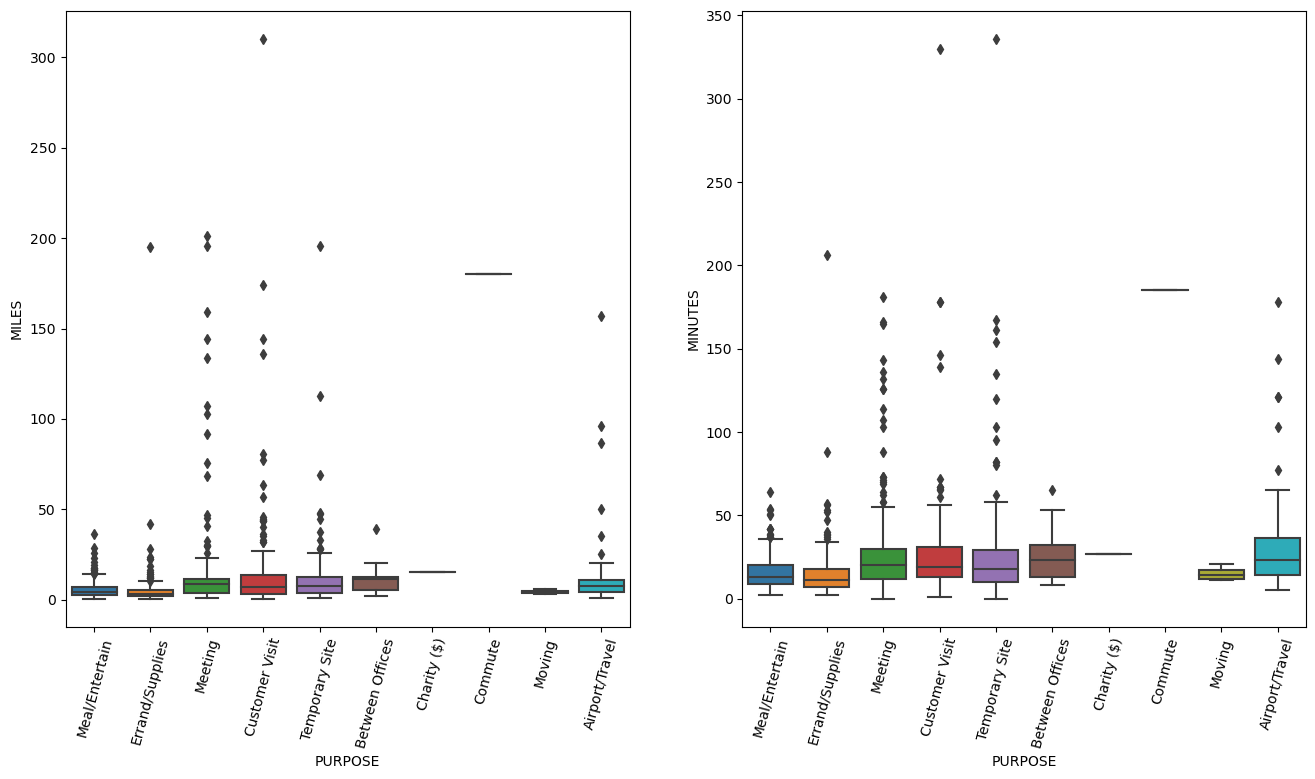

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=75)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MINUTES)
plt.xticks(rotation=75)

In [30]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START']==x['STOP']:
        return 'YES'
    else:
        return 'No'
    
df['ROUND TRIP']=df.apply(round,axis=1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,ROUND TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1,YES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,1,YES
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1,YES
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1,YES
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1,No
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,12,YES
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,12,No
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12,YES
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12,No


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='ROUND TRIP', ylabel='count'>

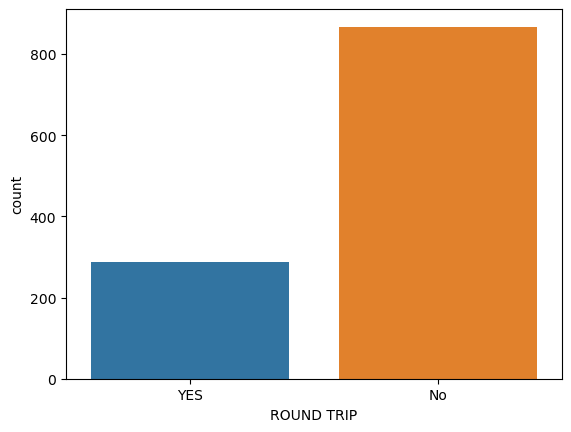

In [31]:
sns.countplot(x=df['ROUND TRIP'])

In [32]:
df['MONTH']=df['START_DATE'].dt.month_name()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,ROUND TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,January,YES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,January,YES
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,January,YES
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,January,YES
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,January,No
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,December,YES
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,December,No
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,December,YES
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,December,No


<Axes: xlabel='MONTH', ylabel='count'>

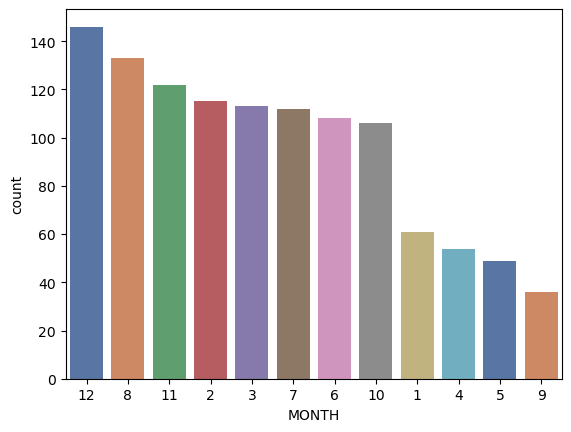

In [33]:
df['MONTH']=df['START_DATE'].dt.month
sns.countplot(x=df.MONTH,order=df['MONTH'].value_counts().index,palette='deep')

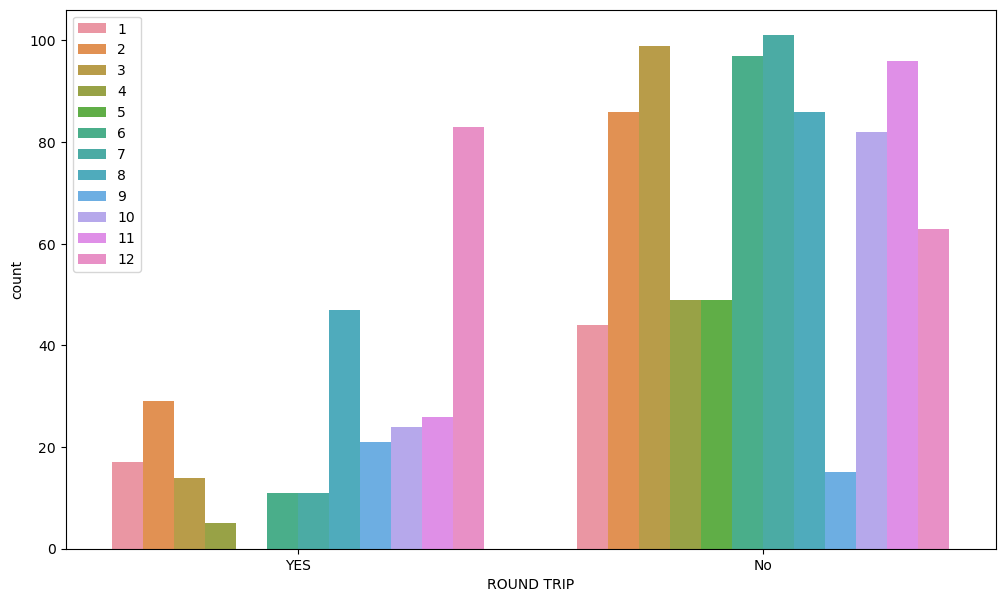

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['ROUND TRIP'],hue=df['MONTH'])
plt.legend()

<Axes: xlabel='MINUTES', ylabel='MILES'>

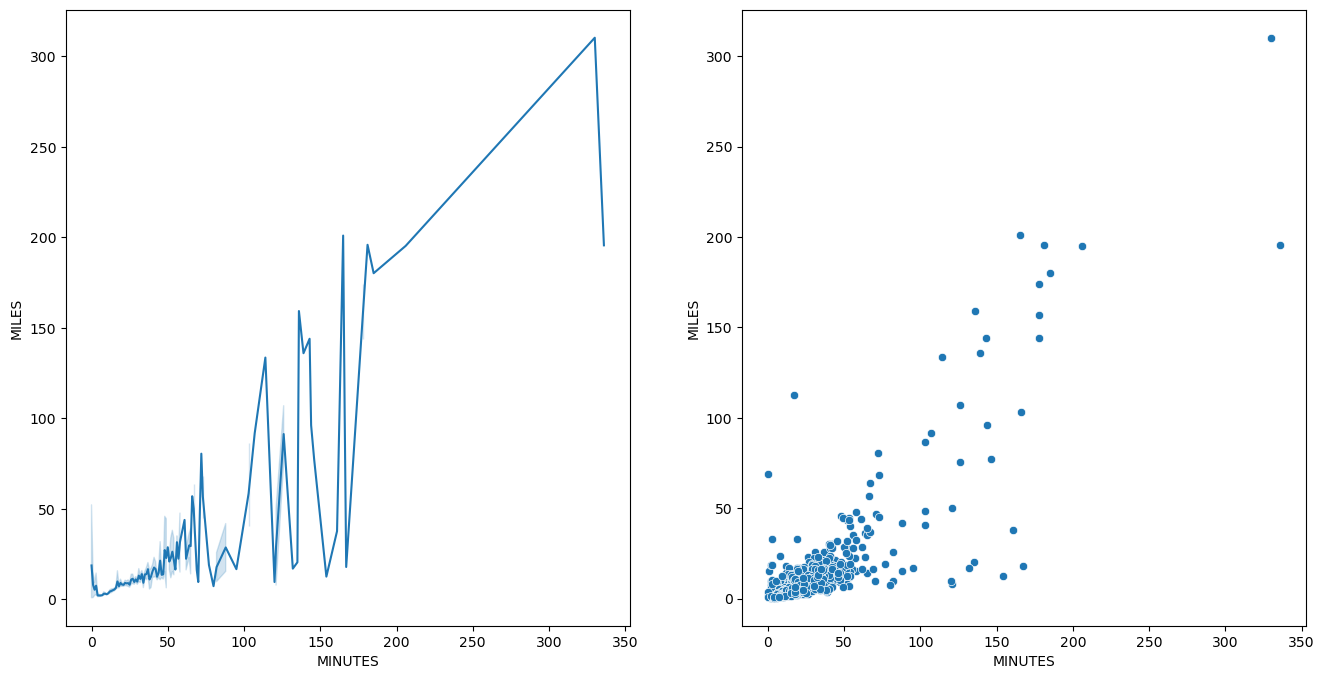

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.lineplot(data=df,y=df.MILES,x=df.MINUTES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,y=df.MILES,x=df.MINUTES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

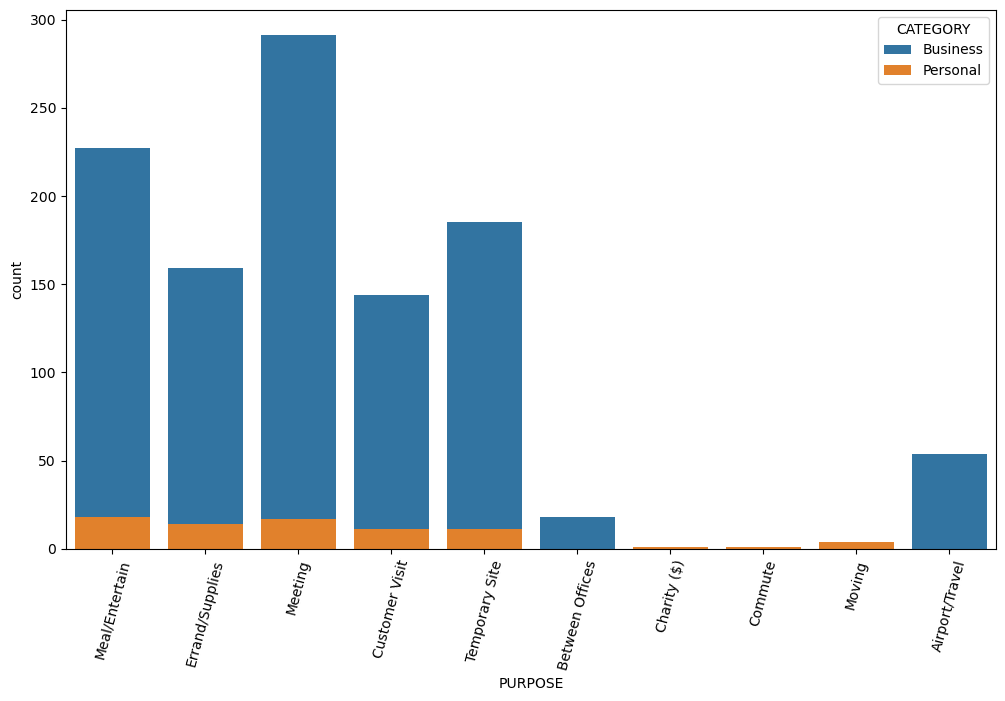

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=75)

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

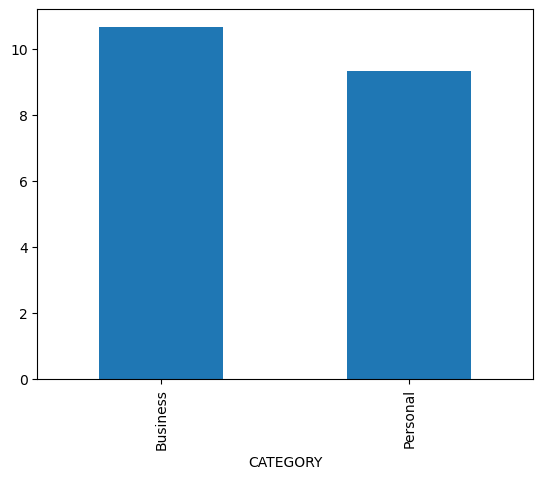

In [37]:
df.groupby(['CATEGORY'])['MILES'].mean().plot(kind='bar')
df.groupby(['CATEGORY'])['MILES'].mean()

In [38]:
df.groupby(['PURPOSE','MONTH'])['MONTH'].count()

PURPOSE          MONTH
Airport/Travel   8        52
                 12        2
Between Offices  2         1
                 3         2
                 4         3
                          ..
Temporary Site   8        34
                 9        36
                 10       42
                 11       17
                 12        9
Name: MONTH, Length: 66, dtype: int64

In [39]:
df['TIME']=pd.DatetimeIndex(df['START_DATE']).hour

In [40]:
df.max()


START_DATE    2016-12-31 22:08:00
END_DATE      2016-12-31 23:51:00
CATEGORY                 Personal
START               Winston Salem
STOP                Winston Salem
MILES                       310.3
PURPOSE            Temporary Site
MINUTES                     336.0
MONTH                          12
ROUND TRIP                    YES
TIME                           23
dtype: object

In [41]:
# plt.figure(figsize=(8,5))
# def round(x):
#     if x['START']==x['STOP']:
#         return 'YES'
#     else:
#         return 'No'
    
# df['ROUND TRIP']=df.apply(round,axis=1)
# df
# def time(x):
#     if (x['TIME']>=5 and x['TIME']<12):
#         print("Morning")
#     elif (x['TIME']>=12 and x['TIME']<=17):
#         print('After noon')
#     elif (x['TIME']>=17 and x['TIME']<=21):
#         print('Evening')
#     else:
#         print('Midnight')
        
# df['day_time']=df.apply(time,axis=1)
def time(x):
    if 5 >= x['TIME'] < 12:
        return "Morning"
    elif 12 >= x['TIME'] < 17:
        return 'Afternoon'
    elif 17 >= x['TIME'] < 21:
        return 'Evening'
    else:
        return 'Midnight'
        
df['DAY'] = df.apply(time, axis=1)


In [42]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,MONTH,ROUND TRIP,TIME,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1,YES,21,Midnight
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,1,YES,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1,YES,20,Midnight
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1,YES,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1,No,14,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,12,YES,1,Morning
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,12,No,13,Evening
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12,YES,15,Evening
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12,No,21,Midnight


<Axes: xlabel='DAY'>

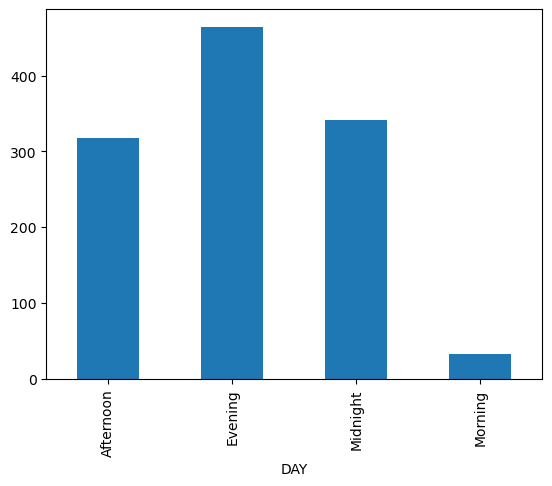

In [43]:
df.groupby(['DAY'])['DAY'].count().plot(kind='bar')

<Axes: xlabel='DAY', ylabel='count'>

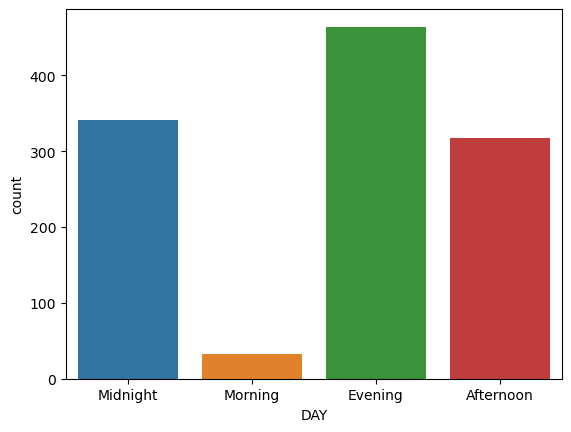

In [44]:
sns.countplot(x=df.DAY)

In [ ]:
from d3blocks import d3blocks
# Initialize
d3 = D3Blocks()
